<a href="https://colab.research.google.com/github/deadlyeyes322/practice_mirea/blob/main/analyst_data_analys/vacancie_analys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/deadlyeyes322/practice_mirea.git

Cloning into 'practice_mirea'...
remote: Enumerating objects: 1566, done.
remote: Counting objects: 100% (1566/1566), done.
remote: Compressing objects: 100% (1379/1379), done.
remote: Total 1566 (delta 165), reused 1557 (delta 161), pack-reused 0 (from 0)
Receiving objects: 100% (1566/1566), 5.14 MiB | 14.04 MiB/s, done.
Resolving deltas: 100% (165/165), done.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('/content/practice_mirea/DataScienceData.csv')

In [5]:
df.head()

,Должность,Ссылка,Компания,Зарплата,Опыт,Удаленная работа,PYTHON,SQL,DOCKER,GO,LINUX,GIT,AWS,KUBERNETES,DJANGO,FLASK,MATH,DATA_SCIENCE_LIB
0,"Junior Data Analyst/BI developer (блок ""Сеть П...",https://hh.ru/vacancy/118051262,СБЕР,не указана,От 1 года до 3 лет,Нет,1,1,0,0,0,0,0,0,0,0,0,1
1,Frontend-разработчик,https://hh.ru/vacancy/118332531,CODex,от 80000 RUR,От 1 года до 3 лет,Нет,0,0,0,0,0,1,0,0,0,0,0,0
2,Frontend-разработчик,https://hh.ru/vacancy/118987277,АстраЗенека,не указана,От 3 до 6 лет,Нет,0,0,0,0,0,0,0,0,0,0,0,0
3,Fullstack QA (гибридный формат работы),https://hh.ru/vacancy/119124248,LIAN,до 260000 RUR,От 3 до 6 лет,Нет,0,0,0,0,0,1,0,0,0,0,0,0
4,Python Developer Middle+,https://hh.ru/vacancy/119170068,АстраЗенека,не указана,От 1 года до 3 лет,Нет,1,1,1,0,0,0,0,0,0,0,0,0


<ipython-input-8-4b6b2c037fb3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=skills_sum.values, y=skills_sum.index, palette="viridis")


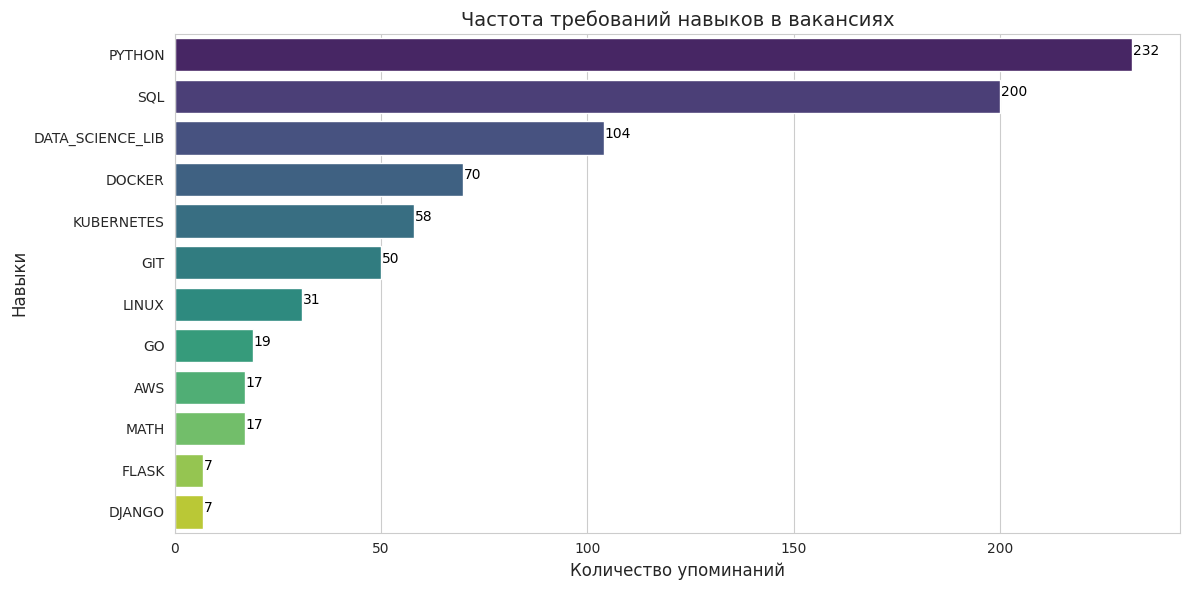

In [8]:
skills = df.iloc[:, 6:]

skills_sum = skills.sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.barplot(x=skills_sum.values, y=skills_sum.index, palette="viridis")
for i, v in enumerate(skills_sum.values):
    ax.text(v + 0.2, i, str(v), color='black', ha='left')

plt.title('Частота требований навыков в вакансиях', fontsize=14)
plt.xlabel('Количество упоминаний', fontsize=12)
plt.ylabel('Навыки', fontsize=12)
plt.tight_layout()

plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Должность         407 non-null    object
 1   Ссылка            407 non-null    object
 2   Компания          407 non-null    object
 3   Зарплата          407 non-null    object
 4   Опыт              407 non-null    object
 5   Удаленная работа  407 non-null    object
 6   PYTHON            407 non-null    int64 
 7   SQL               407 non-null    int64 
 8   DOCKER            407 non-null    int64 
 9   GO                407 non-null    int64 
 10  LINUX             407 non-null    int64 
 11  GIT               407 non-null    int64 
 12  AWS               407 non-null    int64 
 13  KUBERNETES        407 non-null    int64 
 14  DJANGO            407 non-null    int64 
 15  FLASK             407 non-null    int64 
 16  MATH              407 non-null    int64 
 17  DATA_SCIENCE_LIB

In [80]:
experience_mapping = {
    'Нет опыта': 0,
    'От 1 года до 3 лет': 2,  # среднее между 1 и 3
    'От 3 до 6 лет': 4.5,     # среднее между 3 и 6
    'Более 6 лет': 7           # можно задать условное значение
}

df['exp_in_num'] = df['Опыт'].map(experience_mapping)

In [29]:
df.describe()

,PYTHON,SQL,DOCKER,GO,LINUX,GIT,AWS,KUBERNETES,DJANGO,FLASK,MATH,DATA_SCIENCE_LIB,exp_in_num
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.570025,0.491400,0.171990,0.046683,0.076167,0.122850,0.041769,0.142506,0.017199,0.017199,0.041769,0.255528,3.759214
std,0.495682,0.500541,0.377836,0.211219,0.265592,0.328669,0.200307,0.349999,0.130172,0.130172,0.200307,0.436695,1.725214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [81]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Удаленная работа (код)'] = le.fit_transform(df['Удаленная работа'])

In [82]:
for i in range(407):
  if df.iloc[i, 3] == 'не указана':
    df.iloc[i, 3] = np.nan
    continue

  text = str(df.iloc[i, 3]).split()
  if len(text) == 5:
    df.iloc[i, 3] = (int(text[1]) + int(text[3])) // 2
  if len(text) == 3:
    df.iloc[i, 3] = int(text[1])
  if text[-1] == 'USD':
    df.iloc[i, 3] *= 93

In [83]:
df.iloc[37:45]

,Должность,Ссылка,Компания,Зарплата,Опыт,Удаленная работа,PYTHON,SQL,DOCKER,GO,LINUX,GIT,AWS,KUBERNETES,DJANGO,FLASK,MATH,DATA_SCIENCE_LIB,exp_in_num,Удаленная работа (код)
37,Владелец продукта / Product owner,https://hh.ru/vacancy/118497533,X5 Tech,NaN,От 3 до 6 лет,Нет,0,0,0,0,0,0,0,0,0,0,0,0,4.5,1
38,Software Engineer Blockchain,https://hh.ru/vacancy/118294988,Veretin Solutions Global,790500,От 3 до 6 лет,Да,0,0,0,0,0,0,0,0,0,0,0,0,4.5,0
39,Backend разработчик (apache superset),https://hh.ru/vacancy/118809231,LIAN,250000,От 3 до 6 лет,Да,1,1,1,0,0,0,0,0,0,1,0,0,4.5,0
40,Reporting Engineer,https://hh.ru/vacancy/119172348,Нова Энерджис,NaN,От 3 до 6 лет,Нет,0,0,0,0,0,0,0,0,0,0,0,0,4.5,1
41,Продуктовый аналитик (гибридный формат работы),https://hh.ru/vacancy/118983388,LIAN,170000,От 1 года до 3 лет,Нет,0,1,0,0,0,0,0,0,0,0,0,0,2.0,1
42,"Java разработчик, Поисковая платформа",https://hh.ru/vacancy/117835206,Ozon,NaN,От 3 до 6 лет,Да,0,1,0,0,0,0,0,1,0,0,0,0,4.5,0
43,Руководитель IT/ Product разработки,https://hh.ru/vacancy/119120121,JuicyScore,NaN,Более 6 лет,Нет,0,1,1,1,1,0,0,1,0,0,0,0,7.0,1
44,"Data Scientist (NLP, ИИ-агенты) в блок ""Страте...",https://hh.ru/vacancy/118264841,СБЕР,NaN,От 1 года до 3 лет,Нет,1,0,0,0,0,0,0,0,0,0,0,1,2.0,1


In [84]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [85]:
not_null_salaries = df.iloc[df['Зарплата'].notna().values]

X_train, X_test, y_train, y_test = train_test_split(
    not_null_salaries.iloc[:, 6::],
    not_null_salaries.iloc[:, 3],
    test_size=0.15,
    random_state=10
)
X_train.shape, X_test.shape

((55, 14), (10, 14))

In [86]:
params = {'n_neighbors': [2, 3, 4, 5], 'metric': ['euclidean', 'manhattan', 'minkowski']}
knn = KNeighborsRegressor()
model = GridSearchCV(knn, params)

model.fit(X_train, y_train)
print(model.best_score_, model.best_params_)

0.1574826092241367 {'metric': 'euclidean', 'n_neighbors': 5}


In [87]:
knn = KNeighborsRegressor(n_neighbors=4, metric='euclidean')
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.04795267546365711

In [91]:
from sklearn.metrics import mean_absolute_error

y_pred = knn.predict(X_test)
df_pred_real = pd.DataFrame({'predict': y_pred, 'real': y_test})
print(mean_absolute_error(y_pred, y_test))
df_pred_real

135975.0


,predict,real
56,142125.0,40000
7,202500.0,75000
250,550000.0,558000
8,550000.0,320000
26,226250.0,75000
154,222625.0,277500
53,202500.0,100000
171,267312.5,7500
227,267312.5,320000
76,550000.0,279000


In [94]:
from sklearn.tree import DecisionTreeRegressor

params = {'criterion': ['squared_error', 'absolute_error'],
          'max_depth': [None, 3, 5, 7, 10],
          'min_samples_split': [2, 5, 10, 15],
          'min_samples_leaf': [1, 2, 4, 6], }

tree = DecisionTreeRegressor(random_state=10)
model = GridSearchCV(tree, params)
model.fit(X_train, y_train)
print(model.best_score_, model.best_params_)

0.21384139583698394 {'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 15}


In [95]:
clf = DecisionTreeRegressor(random_state=10, criterion='absolute_error', min_samples_leaf=6, min_samples_split=15)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.31915164207352764

In [96]:
y_pred = clf.predict(X_test)
df_pred_real = pd.DataFrame({'predict': y_pred, 'real': y_test})
print(mean_absolute_error(y_pred, y_test))
df_pred_real

110900.0


,predict,real
56,125000.0,40000
7,125000.0,75000
250,450000.0,558000
8,450000.0,320000
26,150000.0,75000
154,125000.0,277500
53,125000.0,100000
171,305000.0,7500
227,305000.0,320000
76,450000.0,279000


## Дерево решений показало себя лучше всего, предскажем пустые ячейки зарплаты с помощью этой модели

In [100]:
for i in range(407):
  if pd.isna(df.iloc[i, 3]):
    features = df.iloc[i, 6:].values.reshape(1, -1)
    df.iloc[i, 3] = clf.predict(features)[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

{'whiskers': [<matplotlib.lines.Line2D at 0x787e6291a450>,
 'caps': [<matplotlib.lines.Line2D at 0x787e6291a550>,
 'boxes': [<matplotlib.lines.Line2D at 0x787e62873f10>],
 'medians': [<matplotlib.lines.Line2D at 0x787e629182d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x787e62699090>],
 'means': []}

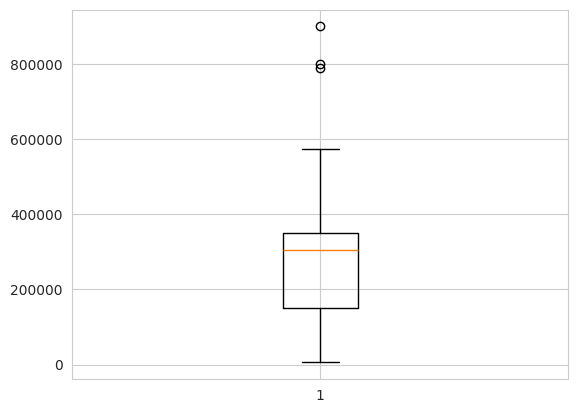

In [103]:
plt.boxplot(df[['Зарплата']])

(array([  9., 140.,   8., 204.,  37.,   2.,   4.,   0.,   2.,   1.]),
 array([  5750.,  95175., 184600., 274025., 363450., 452875., 542300.,
        631725., 721150., 810575., 900000.]),
 <BarContainer object of 10 artists>)

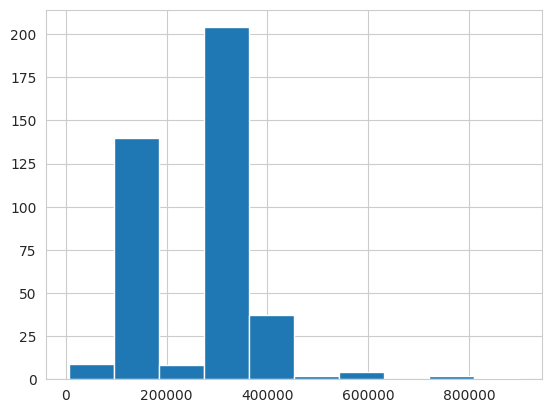

In [105]:
plt.hist(df[['Зарплата']])

In [111]:
print(df[['Зарплата']].median(), df[['Зарплата']].mean(), sep='\n')

Зарплата    305000.0
dtype: object
Зарплата    273253.071253
dtype: object


<Axes: >

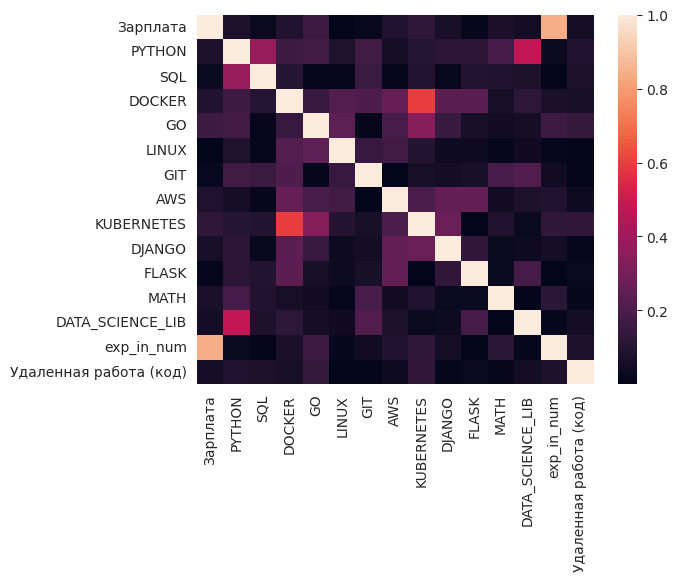

In [118]:
corr_df = df[['Зарплата', 'PYTHON', 'SQL', 'DOCKER', 'GO',	'LINUX', 'GIT',	'AWS', 'KUBERNETES', 'DJANGO', 'FLASK',	'MATH',	'DATA_SCIENCE_LIB',	'exp_in_num',	'Удаленная работа (код)']].corr().abs()

sns.heatmap(corr_df,
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values)